In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
train_df = pd.read_csv('../data/raw/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_df = pd.read_csv('../data/raw/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [11]:
column_info = pd.DataFrame(
    {
        'Column': train_df.columns,
        'Data_types' : train_df.dtypes.values,
        'Non-null_count': train_df.notnull().sum().values,
        'Null_count': train_df.isnull().sum().values,
        'Null_percentage': (train_df.isnull().sum().values / train_df.shape[0]) * 100,
    }
)

In [12]:
print(f"\nTotal Columns: {len(train_df.columns)}")
print(f"Numerical Columns: {len(train_df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical Columns: {len(train_df.select_dtypes(include=['object']).columns)}")
print(column_info)


Total Columns: 81
Numerical Columns: 38
Categorical Columns: 43
           Column Data_types  Non-null_count  Null_count  Null_percentage
0              Id      int64            1460           0            0.000
1      MSSubClass      int64            1460           0            0.000
2        MSZoning     object            1460           0            0.000
3     LotFrontage    float64            1201         259           17.740
4         LotArea      int64            1460           0            0.000
5          Street     object            1460           0            0.000
6           Alley     object              91        1369           93.767
7        LotShape     object            1460           0            0.000
8     LandContour     object            1460           0            0.000
9       Utilities     object            1460           0            0.000
10      LotConfig     object            1460           0            0.000
11      LandSlope     object            1460   

In [13]:
print("\n" + "=" * 80)
print("SALEPRICE STATISTICS")
print("=" * 80)

print(f"Mean Price: ${train_df['SalePrice'].mean():,.2f}")
print(f"Median Price: ${train_df['SalePrice'].median():,.2f}")
print(f"Min Price: ${train_df['SalePrice'].min():,.2f}")
print(f"Max Price: ${train_df['SalePrice'].max():,.2f}")
print(f"Std Dev: ${train_df['SalePrice'].std():,.2f}")
print(f"\nSkewness: {train_df['SalePrice'].skew():.3f}")
print(f"Kurtosis: {train_df['SalePrice'].kurtosis():.3f}")


SALEPRICE STATISTICS
Mean Price: $180,921.20
Median Price: $163,000.00
Min Price: $34,900.00
Max Price: $755,000.00
Std Dev: $79,442.50

Skewness: 1.883
Kurtosis: 6.536


IndexError: index 2 is out of bounds for axis 0 with size 2

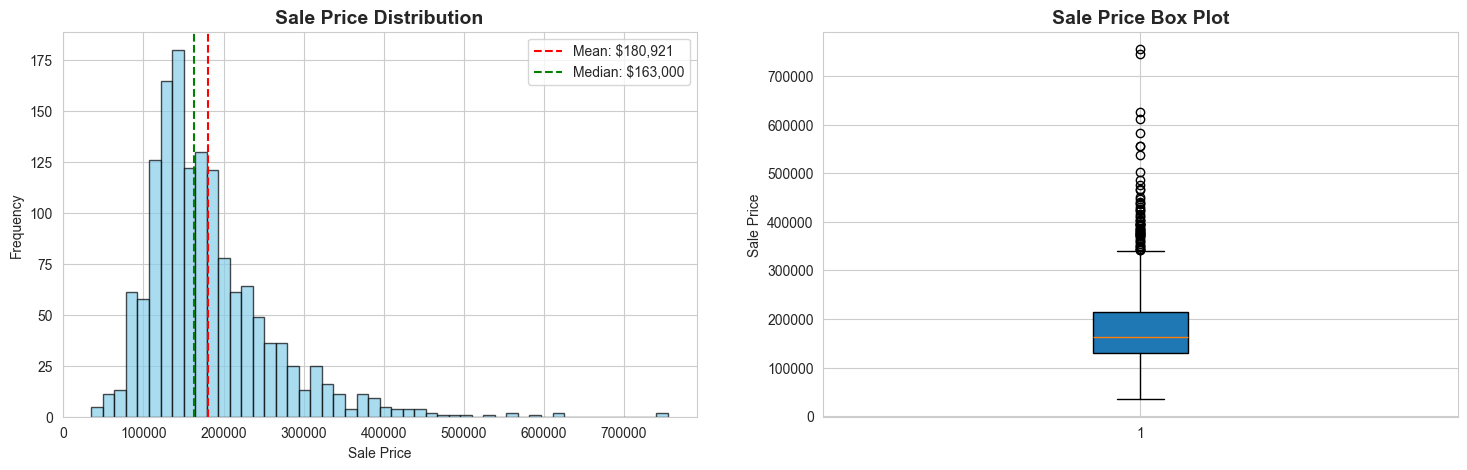

In [14]:
fig, axes = plt.subplots(1, 2 , figsize=(18,5))


axes[0].hist(train_df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Sale Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['SalePrice'].mean(), color='red', linestyle='--', label=f"Mean: ${train_df['SalePrice'].mean():,.0f}")
axes[0].axvline(train_df['SalePrice'].median(), color='green', linestyle='--', label=f"Median: ${train_df['SalePrice'].median():,.0f}")
axes[0].legend()

axes[1].boxplot(train_df['SalePrice'], vert=True, patch_artist=True)
axes[1].set_title('Sale Price Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sale Price')


axes[2].hist(np.log1p(train_df['SalePrice']), bins=50, edgecolor='black', alpha=0.7, color='salmon')
axes[2].set_title('Log-Transformed Sale Price', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Log(Sale Price)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
missing_data = pd.DataFrame({
    'Columns' : train_df.columns,
    'Missing_Count' : train_df.isnull().sum(),
    'Missing_percentage' : ((train_df.isnull().sum().values / train_df.shape[0]) * 100).round(2)

})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(by='Missing_percentage', ascending=False)
print(f"\nColumns with missing values: {len(missing_data)}")
print("\nTop 20 columns with missing values:")
print(missing_data.head(20))


Columns with missing values: 19

Top 20 columns with missing values:
                   Columns  Missing_Count  Missing_percentage
PoolQC              PoolQC           1453              99.520
MiscFeature    MiscFeature           1406              96.300
Alley                Alley           1369              93.770
Fence                Fence           1179              80.750
MasVnrType      MasVnrType            872              59.730
FireplaceQu    FireplaceQu            690              47.260
LotFrontage    LotFrontage            259              17.740
GarageType      GarageType             81               5.550
GarageYrBlt    GarageYrBlt             81               5.550
GarageFinish  GarageFinish             81               5.550
GarageQual      GarageQual             81               5.550
GarageCond      GarageCond             81               5.550
BsmtExposure  BsmtExposure             38               2.600
BsmtFinType2  BsmtFinType2             38               2.600


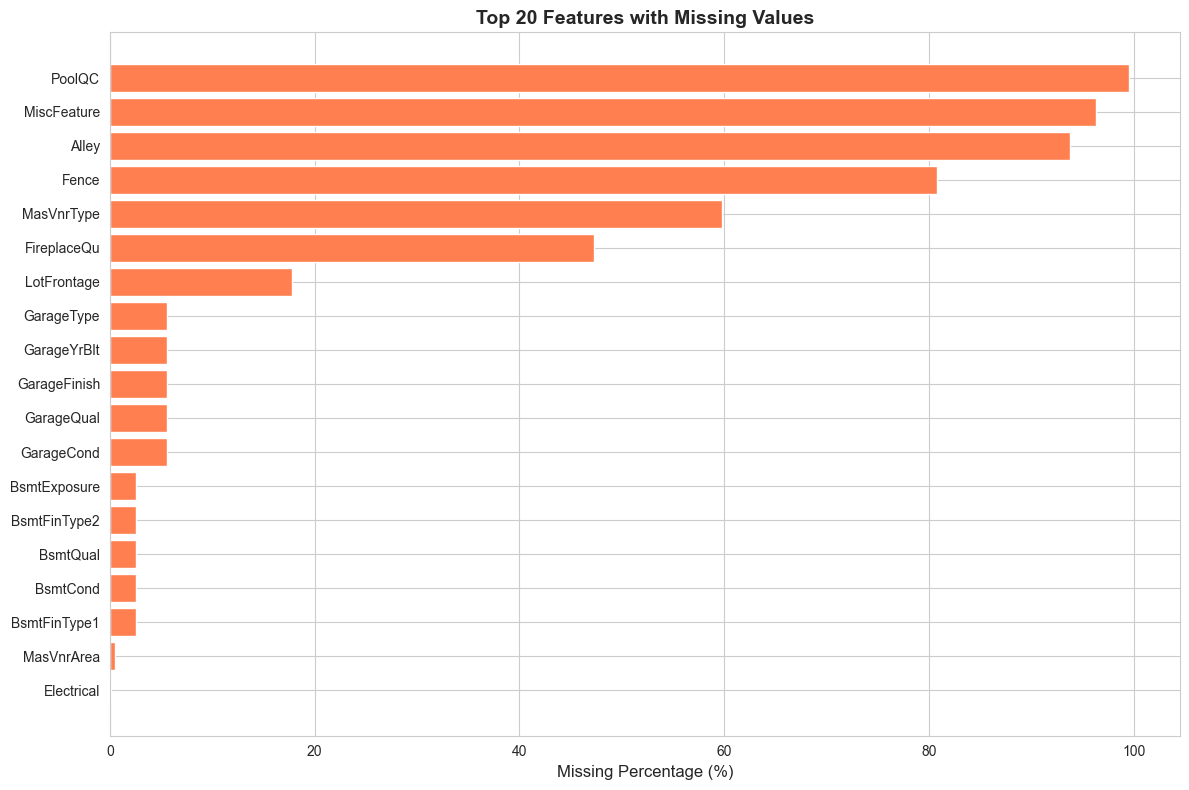

In [18]:
if len(missing_data) > 0:
    plt.figure(figsize=(12, 8))
    plt.barh(missing_data['Columns'][:20], missing_data['Missing_percentage'][:20], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


NUMERICAL FEATURES ANALYSIS

Total Numerical Features: 36
Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']... (showing first 10)
SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
YearRemodAdd   0.507
GarageYrBlt    0.486
MasVnrArea     0.477
Fireplaces     0.467
BsmtFinSF1     0.386
LotFrontage    0.352
Name: SalePrice, dtype: float64


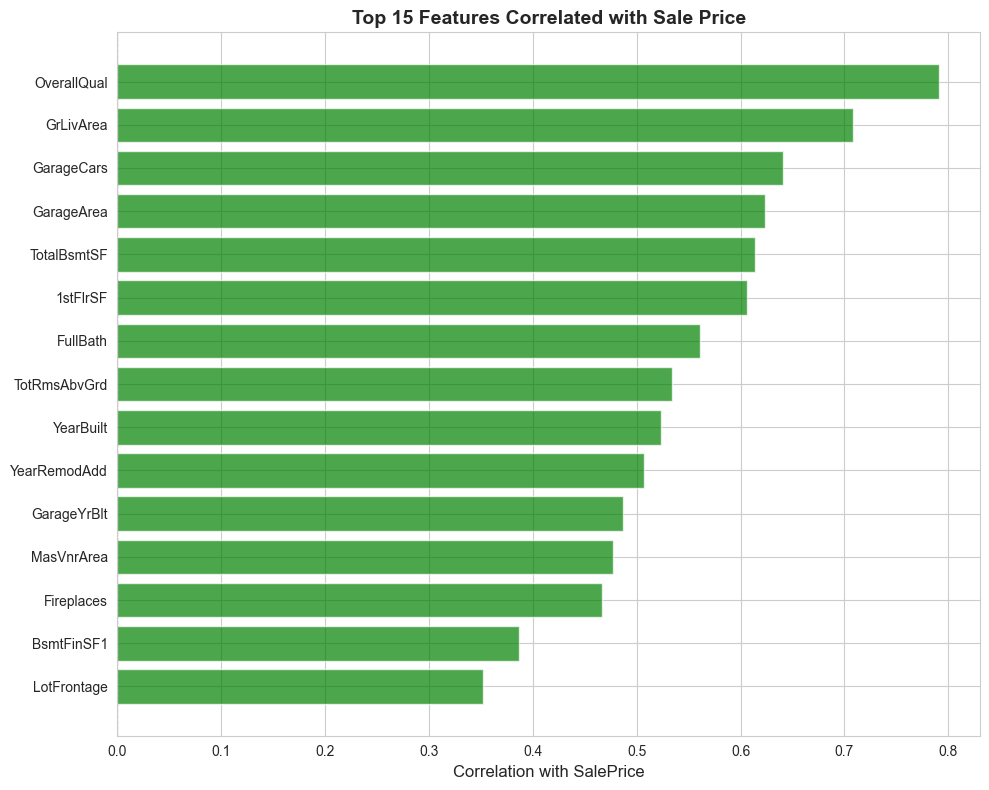

In [19]:
print("\n" + "=" * 80)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 80)

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Id', 'SalePrice']]

print(f"\nTotal Numerical Features: {len(numerical_cols)}")
print(f"Numerical Features: {numerical_cols[:10]}... (showing first 10)")

correlations = train_df[numerical_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

print(correlations.head(16))

top_correlations = correlations.head(16)[1:]

plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
plt.barh(top_correlations.index, top_correlations.values, color=colors, alpha=0.7)
plt.xlabel('Correlation with SalePrice', fontsize=12)
plt.title('Top 15 Features Correlated with Sale Price', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


CORRELATION HEATMAP - TOP FEATURES


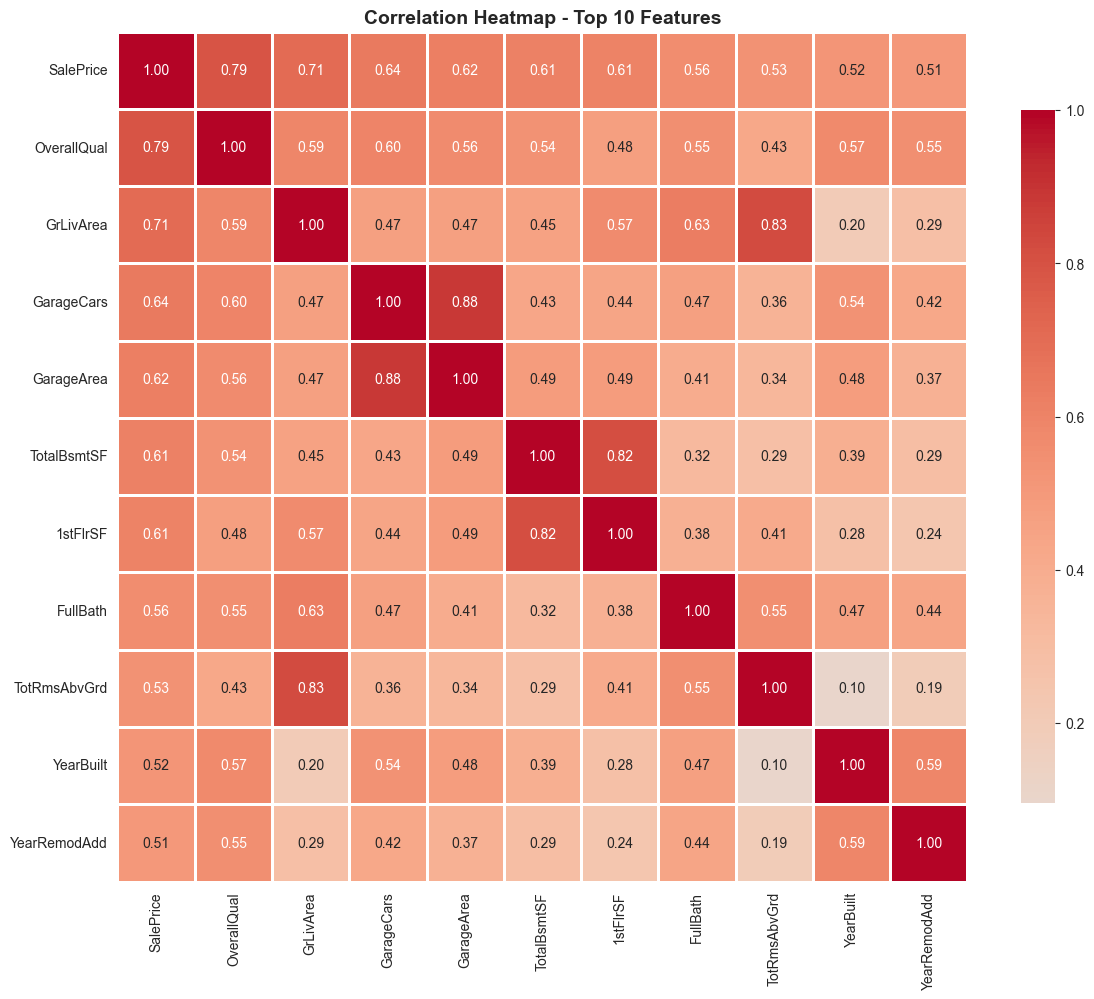

In [20]:
print("\n" + "=" * 80)
print("CORRELATION HEATMAP - TOP FEATURES")
print("=" * 80)


top_features = correlations.head(11).index.tolist()  


corr_matrix = train_df[top_features].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 10 Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


SCATTER PLOTS - TOP FEATURES VS SALEPRICE


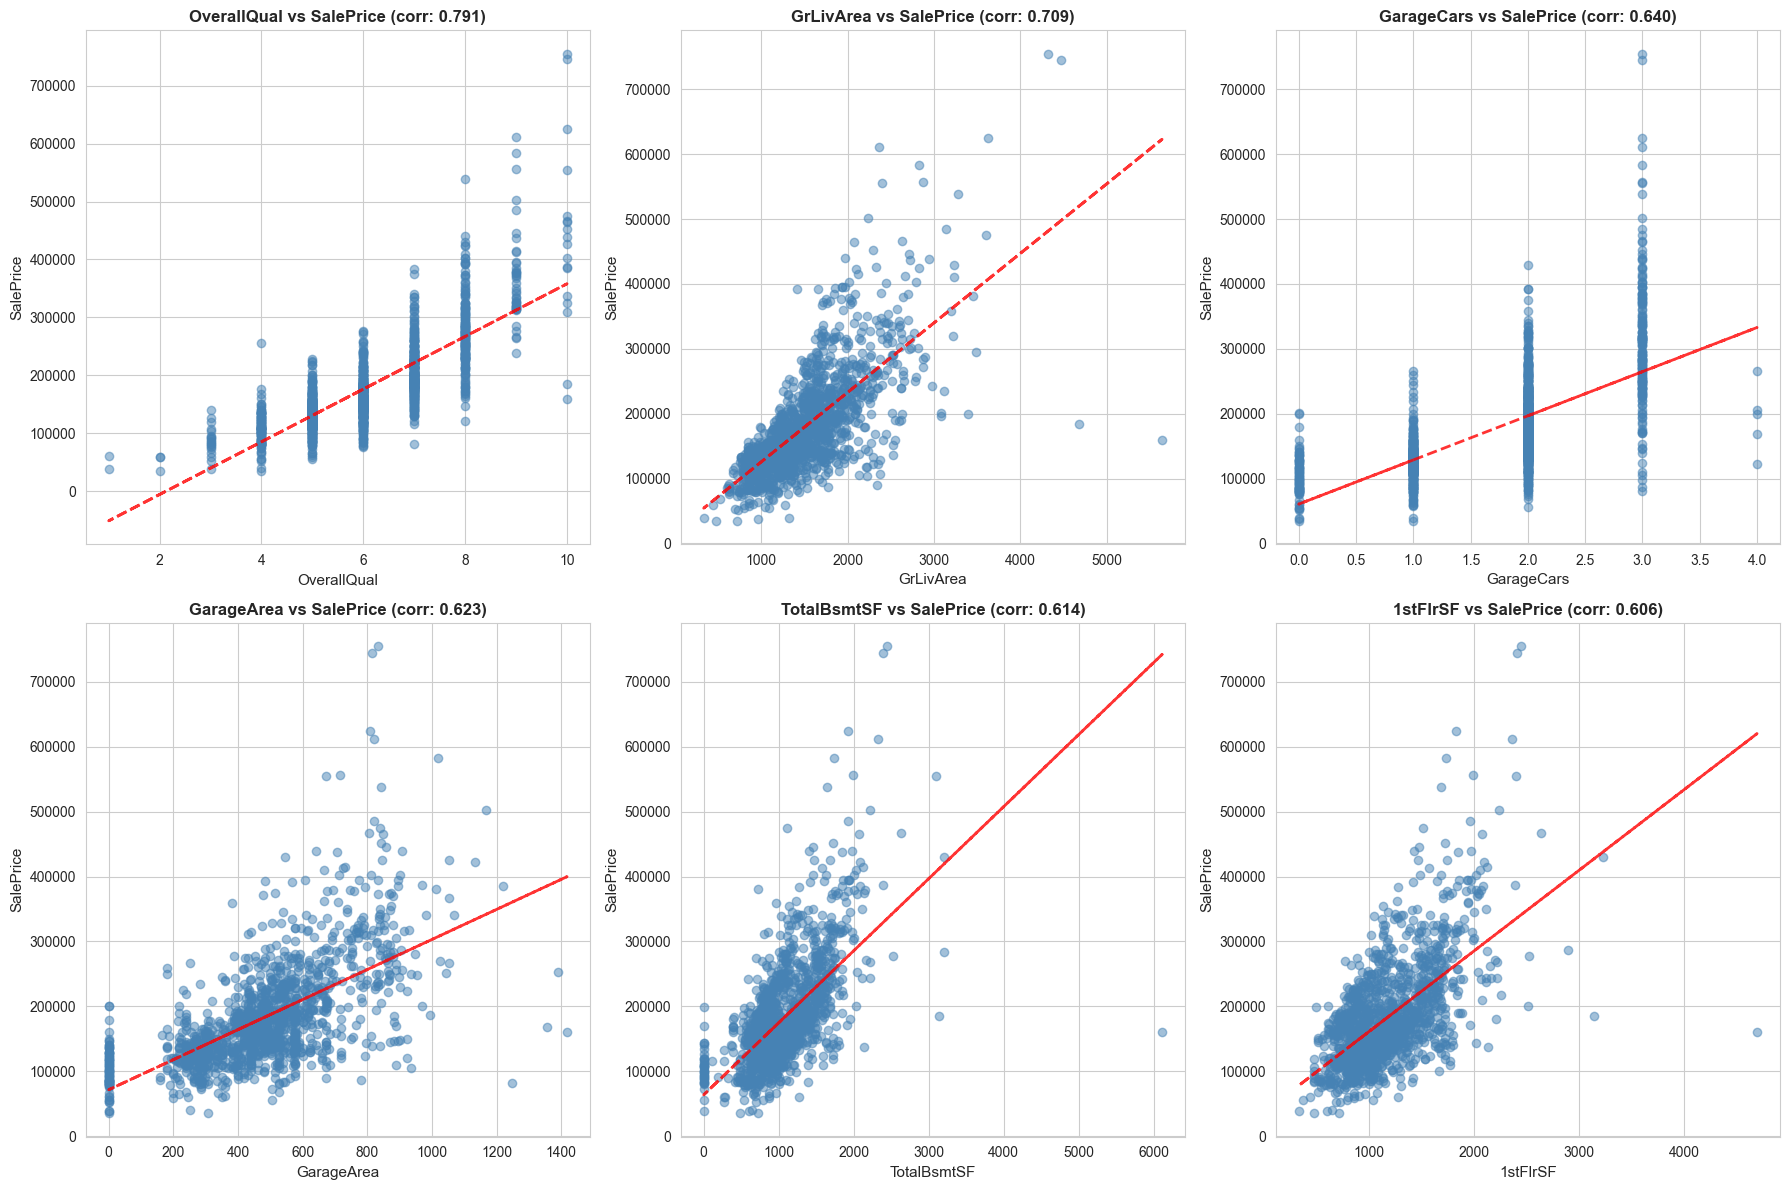

In [22]:
print("\n" + "=" * 80)
print("SCATTER PLOTS - TOP FEATURES VS SALEPRICE")
print("=" * 80)

top_6_features = correlations.head(7).index.tolist()[1:]  # Exclude SalePrice

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_6_features):
    axes[idx].scatter(train_df[feature], train_df['SalePrice'], alpha=0.5, color='steelblue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('SalePrice', fontsize=11)
    axes[idx].set_title(f'{feature} vs SalePrice (corr: {correlations[feature]:.3f})', 
                        fontsize=12, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(train_df[feature].fillna(0), train_df['SalePrice'], 1)
    p = np.poly1d(z)
    axes[idx].plot(train_df[feature], p(train_df[feature].fillna(0)), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

In [23]:
print("\n" + "=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

# Get categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nTotal Categorical Features: {len(categorical_cols)}")
print(f"Categorical Features: {categorical_cols}")

# Analyze key categorical features
key_categorical = ['Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']

for feature in key_categorical:
    if feature in train_df.columns:
        print(f"\n{feature} - Value Counts:")
        print(train_df[feature].value_counts().head(10))


CATEGORICAL FEATURES ANALYSIS

Total Categorical Features: 43
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Neighborhood - Value Counts:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64

BldgType - Value Counts:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: 


BOX PLOTS - CATEGORICAL FEATURES VS SALEPRICE


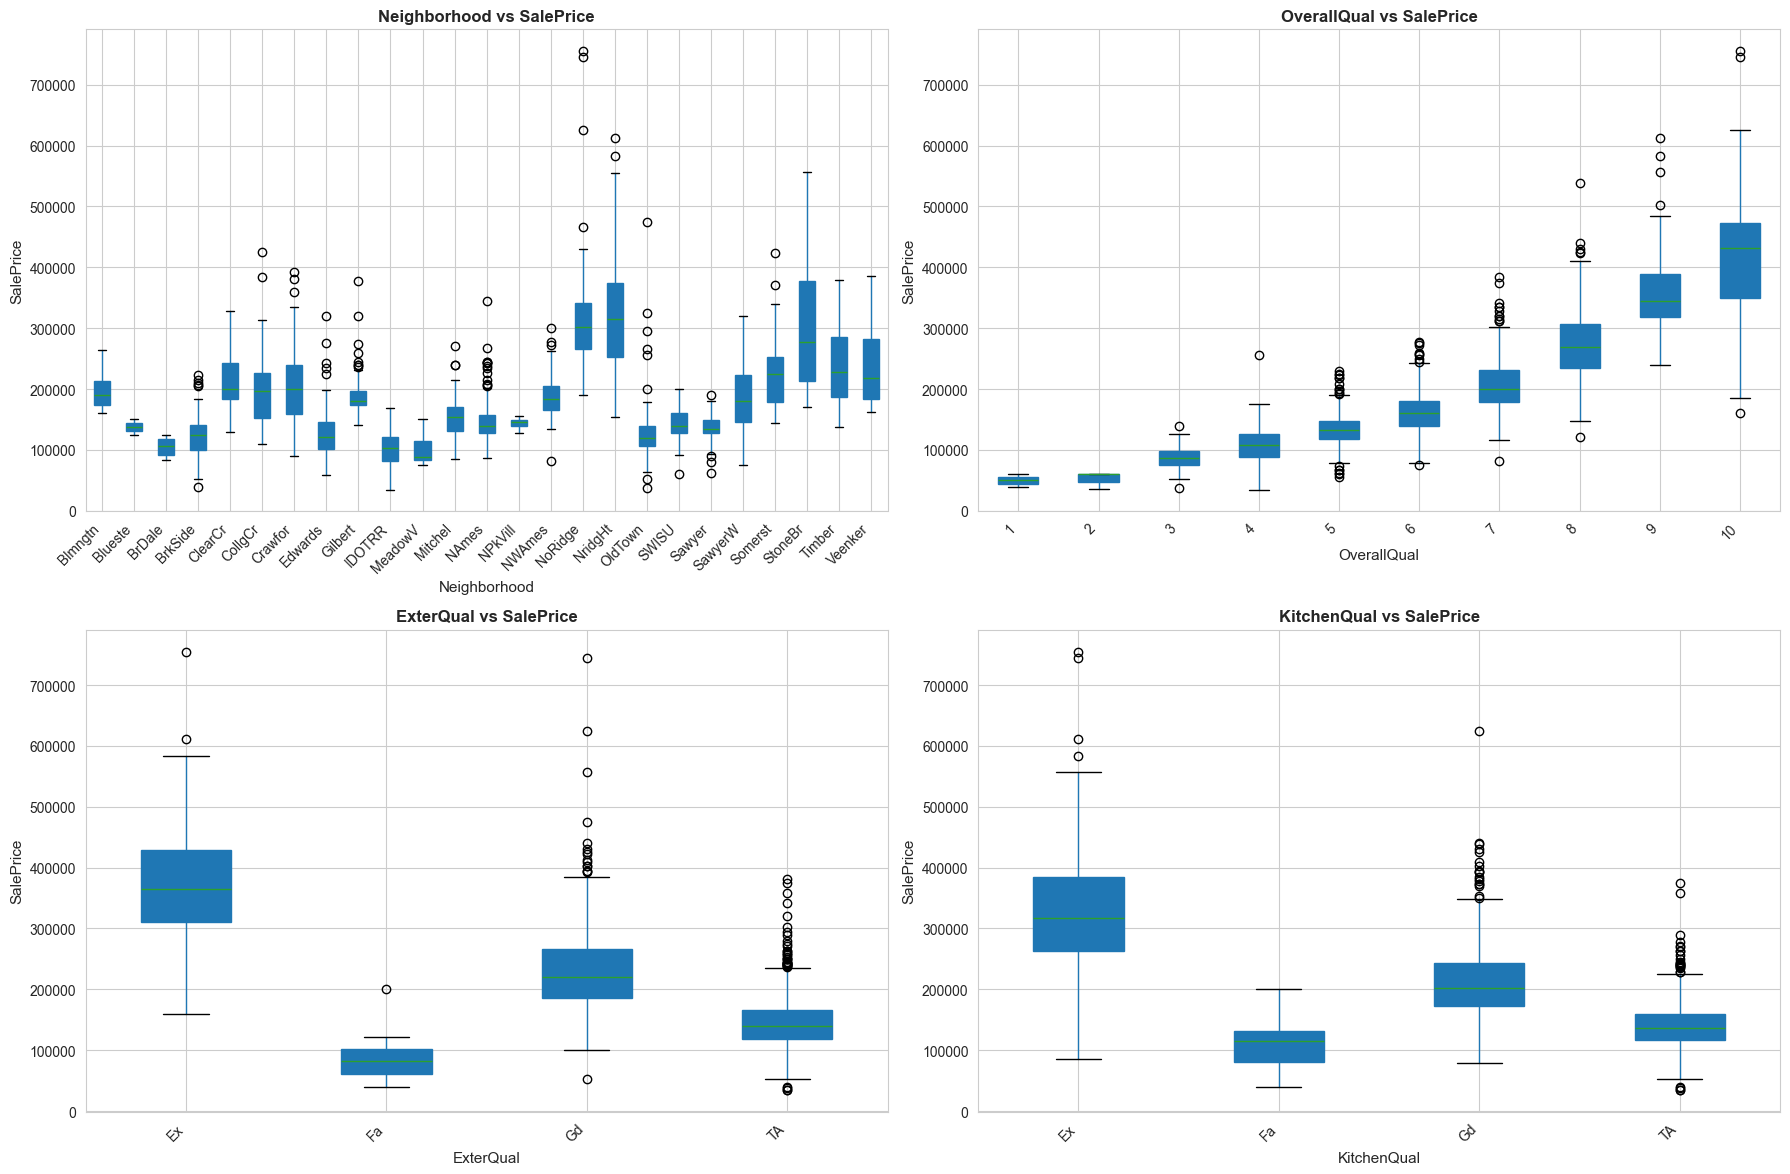

In [24]:
print("\n" + "=" * 80)
print("BOX PLOTS - CATEGORICAL FEATURES VS SALEPRICE")
print("=" * 80)

# Select interesting categorical features
cat_features_to_plot = ['Neighborhood', 'OverallQual', 'ExterQual', 'KitchenQual']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(cat_features_to_plot):
    if feature in train_df.columns:
        # Calculate median sale price for each category
        median_prices = train_df.groupby(feature)['SalePrice'].median().sort_values(ascending=False)
        
        # Create box plot
        train_df.boxplot(column='SalePrice', by=feature, ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'{feature} vs SalePrice', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('SalePrice', fontsize=11)
        axes[idx].get_figure().suptitle('')  # Remove default title
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


OUTLIER DETECTION


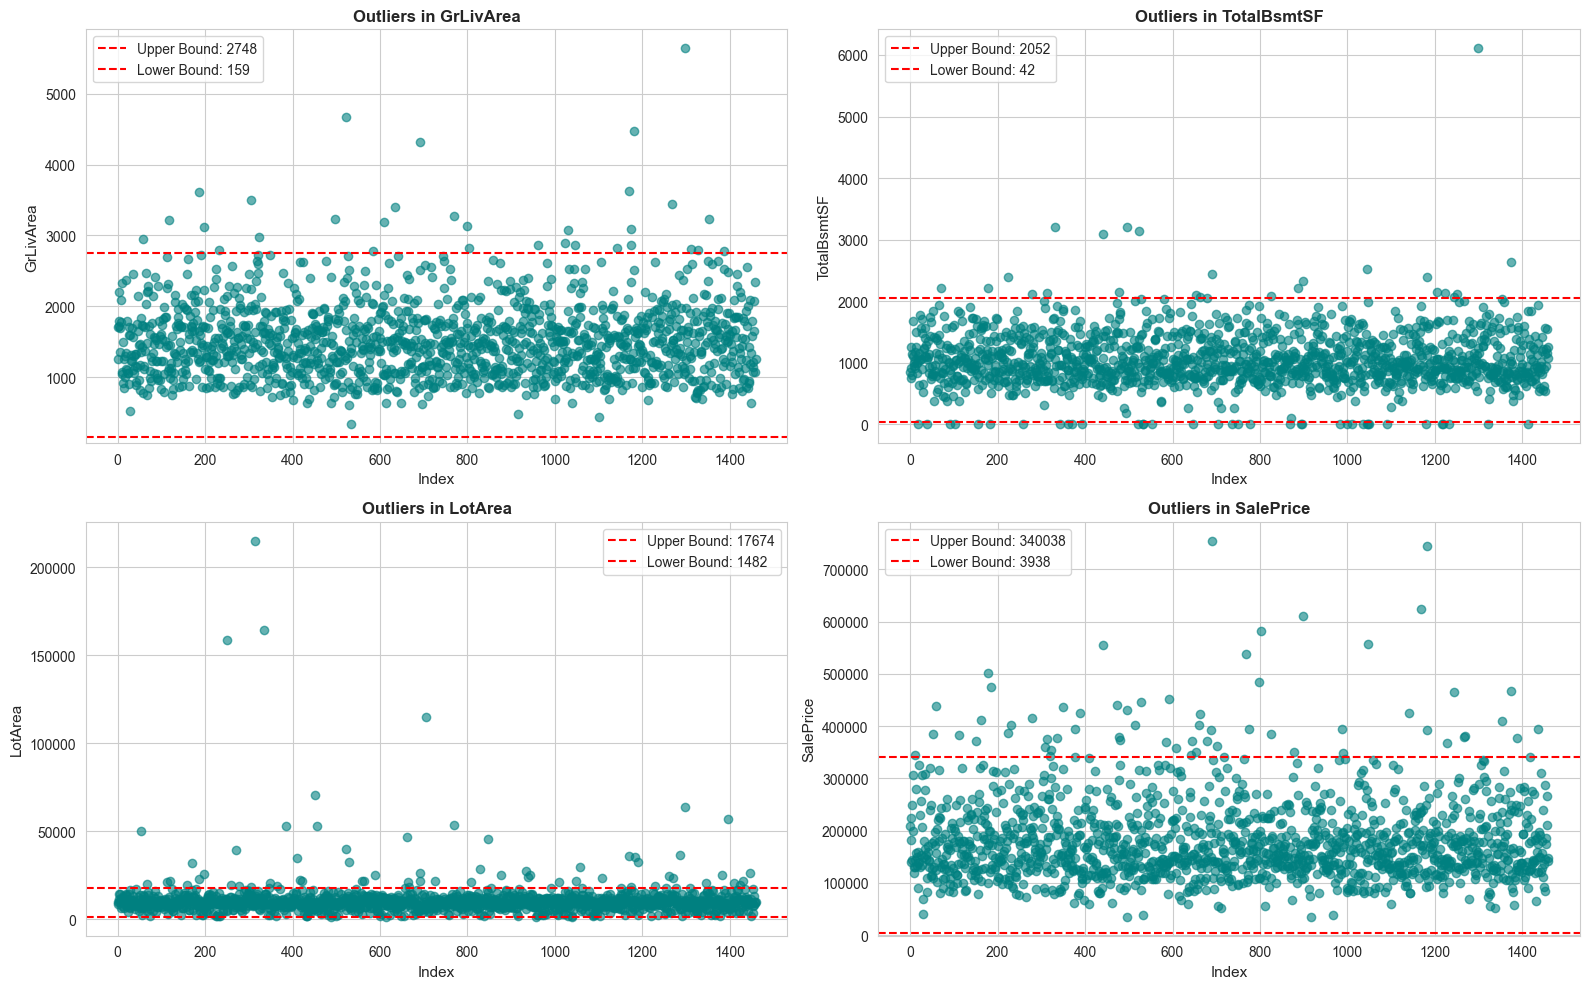

In [25]:
print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Check for outliers in key numerical features
outlier_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'SalePrice']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(outlier_features):
    if feature in train_df.columns:
        axes[idx].scatter(train_df.index, train_df[feature], alpha=0.6, color='teal')
        axes[idx].set_title(f'Outliers in {feature}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Index', fontsize=11)
        axes[idx].set_ylabel(feature, fontsize=11)
        
        # Add horizontal lines for quartiles
        q1 = train_df[feature].quantile(0.25)
        q3 = train_df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        axes[idx].axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper Bound: {upper_bound:.0f}')
        axes[idx].axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower Bound: {lower_bound:.0f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()